In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 18.7 MB/s 


In [ ]:
pip install mne-features

     |████████████████████████████████| 40 kB 4.9 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=5ff2dc8eb6813595a332f5bfbf2a4f34757b103a8f63bb2ecb865b9fcd9eafac
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [ ]:
pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas

In [ ]:
pip install git+https://github.com/mne-tools/mne-features.git#egg=mne_features

  Cloning https://github.com/mne-tools/mne-features.git to /tmp/pip-install-xiimaft8/mne-features_dc92e1d8d30542f0a10e136c284692fe
  Running command git clone -q https://github.com/mne-tools/mne-features.git /tmp/pip-install-xiimaft8/mne-features_dc92e1d8d30542f0a10e136c284692fe


In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 5.1 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=1a267a690c5e0f7bea178567a05153c8bc0f2f3b26f2cbe92841921efa288476
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,543,-166,192,230,573,860,128,59,272,473,325,379,536,348,383,105,607,289,459,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,495,-138,201,233,554,846,185,47,269,455,307,368,529,327,369,78,613,248,409,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,534,-163,198,207,542,768,145,52,250,452,273,273,511,319,355,66,606,320,440,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,525,-310,212,221,542,808,115,41,276,432,258,241,521,336,356,71,568,339,437,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,507,-320,242,230,545,865,180,89,288,444,275,275,550,324,346,76,547,343,446,171,67,581,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,40,9,-95,73,-89,233,292,-85,-38,74,-34,2,-305,383,85,-1,444,337,-255,160,-121,-285,-178,subj1_series1_119491,0,0,0,0,0,0
119492,119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,54,256,-224,49,-99,264,304,-210,-59,63,-19,10,-283,334,61,-8,427,322,-310,107,-152,-295,-178,subj1_series1_119492,0,0,0,0,0,0
119493,119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,72,253,-394,35,-134,241,104,-164,-52,45,-45,16,-185,303,53,-24,438,368,-134,187,-99,-269,-121,subj1_series1_119493,0,0,0,0,0,0
119494,119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,67,184,-260,42,-112,232,-168,-119,-30,54,-51,26,-177,341,50,-25,444,348,-135,181,-122,-290,-77,subj1_series1_119494,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(train_complete)

In [ ]:
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)
new_data

,order,C3,Cz,C4,P3,Pz,P4,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,192,230,573,348,383,105,0,0,0,0,0,0
1,1,201,233,554,327,369,78,0,0,0,0,0,0
2,2,198,207,542,319,355,66,0,0,0,0,0,0
3,3,212,221,542,336,356,71,0,0,0,0,0,0
4,4,242,230,545,324,346,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,73,-89,233,85,-1,444,0,0,0,0,0,0
119492,119492,49,-99,264,61,-8,427,0,0,0,0,0,0
119493,119493,35,-134,241,53,-24,438,0,0,0,0,0,0
119494,119494,42,-112,232,50,-25,444,0,0,0,0,0,0


In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
Cz

0         230
1         233
2         207
3         221
4         230
         ... 
119491    -89
119492    -99
119493   -134
119494   -112
119495   -113
Name: Cz, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:
P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

In [ ]:
BR = new_data.loc[:,"BothReleased"]
BR

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: BothReleased, Length: 119496, dtype: int64

## **C3 Channel**

[282, 255, 262, 265, 222, 236, 266, 267, 259, 260, 265, 277, 289, 272, 291, 304, 304, 359, 321, 304, 297, 298, 326, 325, 286, 276, 313, 333, 356, 355, 363, 343, 380, 351, 347, 318, 353, 372, 374, 357, 364, 367, 363, 387, 409, 415, 399, 400, 382, 391, 418, 365, 363, 385, 389, 424, 420, 434, 455, 471, 461, 483, 473, 484, 445, 412, 434, 429, 437, 421, 400, 401, 398, 407, 394, 369, 369, 396, 373, 362, 362, 395, 379, 379, 413, 391, 379, 365, 372, 371, 384, 393, 369, 352, 373, 349, 365, 399, 378, 385, 390, 396, 384, 373, 372, 369, 393, 440, 401, 401, 419, 418, 401, 450, 418, 408, 443, 431, 436, 402, 414, 432, 434, 455, 429, 433, 434, 430, 411, 390, 398, 391, 383, 433, 406, 389, 410, 382, 396, 341, 320, 355, 370, 432, 429, 372, 382, 376, 374, 384, 359, 361, 350, 334, 363, 370, 370, 382, 384, 349, 320, 310, 293, 305, 350, 339, 272, 274, 292, 309, 322, 372, 364, 338, 316, 322, 354, 387, 387, 379, 359, 342, 351, 341, 351, 354, 341, 360, 348, 320, 317, 333, 360, 352, 345, 340, 336, 349, 329, 342,

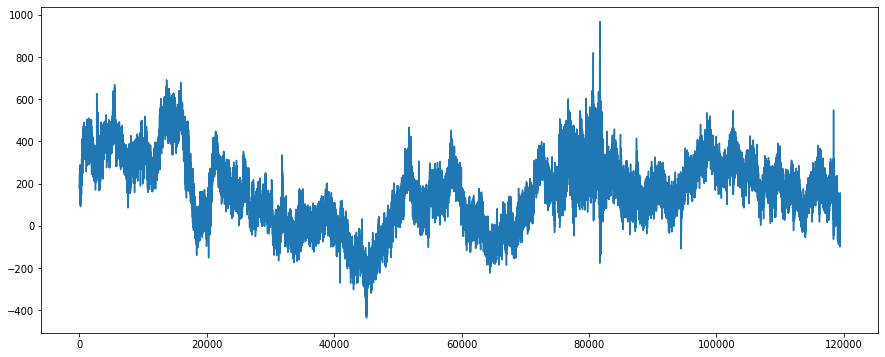

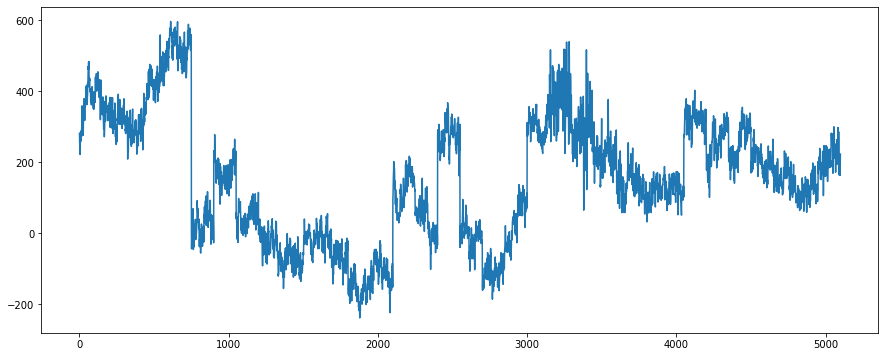

In [ ]:
C3_br = []
for i in range(119495):
  if BR[i] == 1:
    C3_br.append(C3[i])
 
print(C3_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3_br)

<Figure size 1440x432 with 0 Axes>

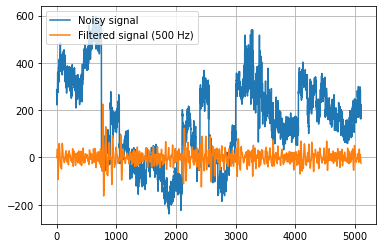

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_br, label='Noisy signal')

y = butter_bandpass_filter(C3_br, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y))

5100


In [ ]:
from scipy.stats import norm, kurtosis
from scipy.stats import skew
import statistics

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5
kurtosis = kurtosis(y)
skewness = skew(y)
peak2peak = max(y)-min(y)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  939.1877781218573
median =  0.07858237123460973
mean =  -0.006918493821165207
Standard Deviation =  30.646170692630708
kurtosis =  4.8269147366639205
skewness =  0.1675720327494941
Peak to peak =  388.39466641466964


In [ ]:
import mne
import mne_features

In [ ]:
#1.mean
mne_features.univariate.compute_mean(y)

-0.006918493821165207

In [ ]:
#2.median
median = np.median(y)
median

0.07858237123460973

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y)

939.1877781218571

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y)

30.646170692630704

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y)

7.8269147366639205

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y)

0.1675720327494941

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y)

388.39466641466964

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y)

30.64316679981225

In [ ]:
#Freqeuncy Domain
#9.power spectrum density
mne_features.utils.power_spectrum(500,y)

(array([4.14076281e-01, 3.35438305e-01, 6.79012263e-01, 2.06430407e+01,
        1.01560374e+02, 7.82788812e+01, 5.46007976e+01, 3.49502863e+01,
        3.23288896e+01, 2.87556187e+01, 1.41712014e+01, 1.77818283e+01,
        2.14670954e+01, 1.39805096e+01, 1.16270797e+01, 9.03322214e+00,
        5.47326073e+00, 2.27762597e+00, 3.93681671e-01, 1.56300575e-01,
        1.31955781e-01, 5.38696163e-02, 1.68536479e-02, 9.19222070e-03,
        7.16387409e-03, 3.98115199e-03, 2.91235584e-03, 1.49728986e-03,
        1.28250702e-03, 1.01230217e-03, 9.55883986e-04, 7.35084539e-04,
        7.92916874e-04, 6.60734767e-04, 5.33491897e-04, 5.50623195e-04,
        4.98364299e-04, 4.77167027e-04, 4.44835266e-04, 4.20025343e-04,
        3.90911823e-04, 3.69224990e-04, 3.55529479e-04, 3.38323209e-04,
        3.19918268e-04, 3.04495726e-04, 2.90714974e-04, 2.81231482e-04,
        2.65850741e-04, 2.55974980e-04, 2.47710691e-04, 2.35809189e-04,
        2.28220988e-04, 2.20267625e-04, 2.11255847e-04, 2.058145

In [ ]:
import numpy as np
import antropy as ant

#10. Spectral entropy
print(ant.spectral_entropy(y, sf=500, method='welch', normalize=True))

0.4997972795295756


In [ ]:
#11. Approximate entropy
print(ant.app_entropy(y))

0.5810207884054721


In [ ]:
#12.zero crossing
import numpy

zs = numpy.where(numpy.diff(numpy.sign(y)))[0]
zs
print(len(zs))

321


## **C4 Channel**

[526, 541, 520, 545, 565, 588, 584, 572, 567, 591, 588, 590, 599, 592, 554, 556, 581, 565, 563, 568, 616, 625, 614, 594, 563, 569, 580, 574, 586, 609, 605, 642, 610, 590, 649, 656, 656, 636, 628, 642, 663, 661, 642, 661, 661, 654, 663, 650, 631, 634, 639, 641, 669, 667, 667, 695, 667, 654, 668, 703, 707, 666, 664, 668, 664, 659, 656, 655, 627, 624, 609, 602, 631, 623, 635, 605, 636, 672, 657, 667, 660, 669, 652, 653, 644, 653, 672, 663, 647, 634, 615, 654, 691, 651, 652, 626, 611, 577, 568, 588, 584, 592, 608, 621, 631, 637, 659, 658, 659, 634, 611, 621, 639, 656, 608, 620, 637, 614, 610, 610, 620, 627, 616, 610, 584, 607, 618, 612, 578, 552, 545, 592, 601, 601, 573, 595, 585, 531, 512, 500, 509, 509, 493, 522, 529, 523, 534, 526, 548, 552, 447, 452, 420, 428, 483, 481, 455, 483, 434, 430, 433, 394, 366, 371, 352, 349, 356, 384, 395, 343, 386, 394, 436, 469, 420, 460, 467, 482, 473, 440, 410, 412, 392, 389, 386, 379, 386, 399, 407, 412, 427, 401, 386, 429, 418, 409, 422, 419, 422, 373,

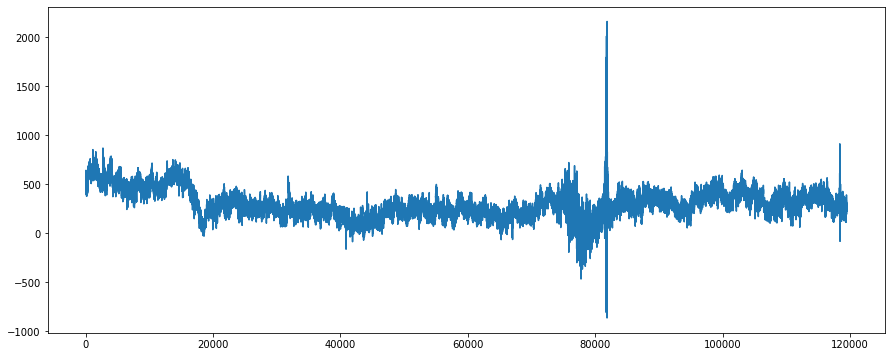

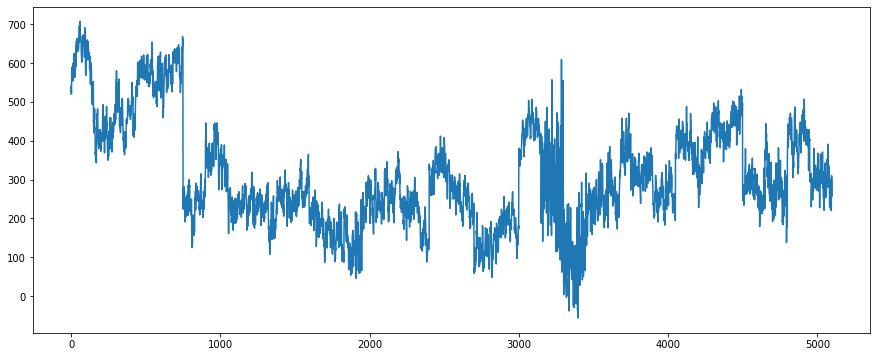

In [ ]:
C4_br = []
for i in range(119495):
  if BR[i] == 1:
    C4_br.append(C4[i])
 
print(C4_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4_br)

<Figure size 1440x432 with 0 Axes>

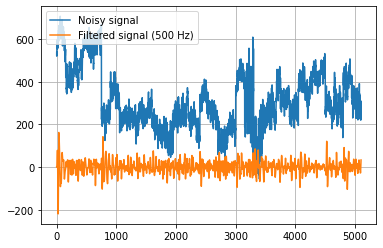

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_br, label='Noisy signal')

y2 = butter_bandpass_filter(C4_br, lowcut, highcut, fs, order=6)

plt.plot( y2, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y2))

5100


In [ ]:
y2 = np.array(y2)
import statistics

median = np.median(y2)
mean = y2.mean()
var = statistics.variance(y2)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y2)
peak2peak = max(y2)-min(y2)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  966.1285239254506
median =  0.08969490695182006
mean =  -0.017423301851138828
Standard Deviation =  31.08260806183179
kurtosis =  4.8269147366639205
skewness =  -0.18438530646307422
Peak to peak =  381.8886683167168


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y2)

-0.017423301851138828

In [ ]:
#2.median
median = np.median(y2)
median

0.08969490695182006

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y2)

966.1285239254506

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y2)

31.08260806183179

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y2)

6.697563407061075

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y2)

-0.18438530646307422

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y2)

381.8886683167168

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y2)

31.07956548170232

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y2)

(array([3.30529283e-01, 2.71676228e-01, 8.68597242e-01, 1.77972827e+01,
        8.29417358e+01, 5.63234648e+01, 5.72622172e+01, 3.91125554e+01,
        3.35522743e+01, 2.69015530e+01, 2.26050364e+01, 2.34037017e+01,
        1.38162080e+01, 8.93795958e+00, 1.29836076e+01, 1.03834859e+01,
        4.58687523e+00, 2.07976082e+00, 1.06415276e+00, 2.38854619e-01,
        9.60537077e-02, 4.34216650e-02, 2.19856617e-02, 1.59358257e-02,
        9.83899346e-03, 8.24715658e-03, 2.61928317e-03, 3.69779056e-03,
        2.21581952e-03, 1.55025093e-03, 1.74009614e-03, 1.53761500e-03,
        1.20513744e-03, 1.26252959e-03, 1.06508113e-03, 1.05229427e-03,
        9.49278806e-04, 8.77304189e-04, 8.91091622e-04, 7.71057741e-04,
        7.80809347e-04, 7.13969637e-04, 6.84498775e-04, 6.46889407e-04,
        6.11484273e-04, 5.94839374e-04, 5.64433915e-04, 5.45181824e-04,
        5.19062866e-04, 5.00523079e-04, 4.76497314e-04, 4.62555985e-04,
        4.47251516e-04, 4.27799959e-04, 4.15591532e-04, 4.015979

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y2, sf=500, method='welch', normalize=True))

0.5144469154745878


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y2))

0.5940068572814949


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y2))

zs = numpy.where(numpy.diff(numpy.sign(y2)))[0]
zs

322


array([  17,   30,   54,   84,  122,  152,  188,  202,  227,  238,  248,
        260,  272,  286,  300,  307,  316,  328,  352,  367,  388,  404,
        421,  435,  446,  462,  492,  531,  549,  565,  578,  606,  641,
        657,  673,  679,  699,  718,  735,  744,  756,  768,  781,  807,
        835,  862,  887,  895,  900,  928,  957,  986,  999, 1001, 1015,
       1031, 1033, 1045, 1064, 1068, 1079, 1094, 1096, 1101, 1112, 1118,
       1132, 1145, 1158, 1174, 1181, 1191, 1205, 1233, 1255, 1272, 1299,
       1338, 1354, 1378, 1393, 1408, 1420, 1424, 1438, 1460, 1474, 1481,
       1491, 1514, 1538, 1563, 1577, 1610, 1627, 1657, 1672, 1680, 1683,
       1707, 1722, 1748, 1773, 1786, 1795, 1805, 1831, 1836, 1844, 1859,
       1884, 1911, 1920, 1926, 1954, 1980, 2001, 2017, 2026, 2037, 2048,
       2061, 2075, 2082, 2094, 2111, 2117, 2128, 2152, 2176, 2189, 2200,
       2210, 2215, 2232, 2260, 2272, 2278, 2292, 2326, 2351, 2360, 2369,
       2394, 2414, 2430, 2457, 2471, 2480, 2496, 25

## **Cz Channel**

[102, 99, 102, 125, 125, 130, 137, 126, 122, 141, 132, 142, 143, 147, 144, 129, 152, 185, 161, 171, 169, 167, 176, 145, 132, 142, 173, 163, 163, 161, 159, 145, 162, 151, 160, 164, 179, 184, 178, 171, 203, 202, 188, 195, 197, 213, 208, 197, 186, 179, 183, 169, 186, 192, 187, 193, 190, 182, 186, 200, 203, 203, 205, 201, 164, 175, 187, 189, 182, 169, 155, 136, 141, 126, 141, 143, 153, 169, 171, 161, 163, 161, 159, 163, 181, 154, 149, 139, 120, 105, 123, 124, 119, 108, 127, 133, 124, 116, 112, 103, 121, 134, 117, 157, 163, 158, 168, 196, 188, 183, 186, 190, 179, 193, 172, 172, 167, 174, 188, 158, 161, 168, 142, 166, 161, 162, 185, 170, 127, 134, 138, 143, 139, 125, 114, 128, 133, 110, 120, 108, 106, 108, 114, 112, 116, 113, 120, 129, 125, 121, 65, 62, 30, 40, 58, 56, 59, 66, 48, 39, 44, 25, 18, 18, 20, 15, 11, 28, 41, 24, 43, 53, 64, 78, 29, 24, 57, 86, 85, 73, 63, 68, 47, 56, 49, 68, 70, 97, 102, 114, 100, 102, 72, 92, 77, 70, 73, 77, 69, 61, 66, 76, 72, 69, 69, 92, 79, 60, 83, 65, 80, 78

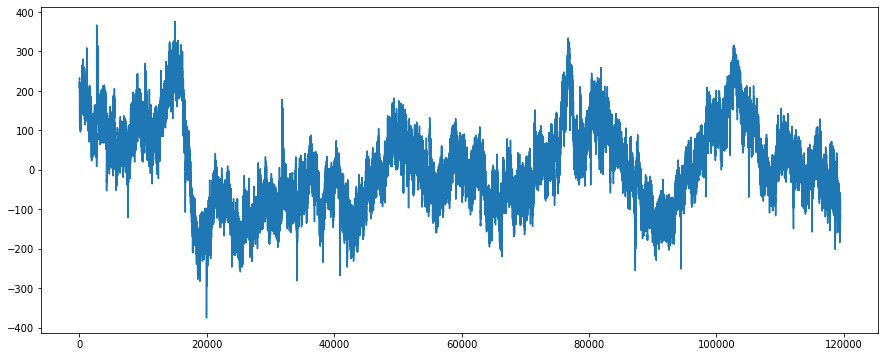

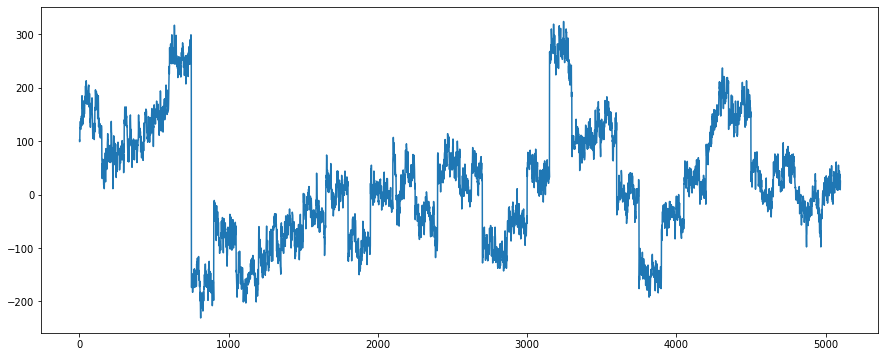

In [ ]:
Cz_br = []
for i in range(119495):
  if BR[i] == 1:
    Cz_br.append(Cz[i])
 
print(Cz_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz_br)

<Figure size 1440x432 with 0 Axes>

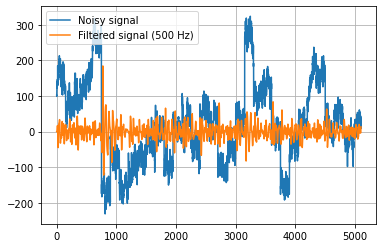

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_br, label='Noisy signal')

y3 = butter_bandpass_filter(Cz_br, lowcut, highcut, fs, order=6)

plt.plot( y3, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y3))

5100


In [ ]:
y3 = np.array(y3)
import statistics

median = np.median(y3)
mean = y3.mean()
var = statistics.variance(y3)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y3)
peak2peak = max(y3)-min(y3)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  505.87881533414105
median =  -0.1562178883878487
mean =  0.0057258305054674495
Standard Deviation =  22.49174993934756
kurtosis =  4.8269147366639205
skewness =  0.41225337140159996
Peak to peak =  306.5304007473437


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y3)

0.0057258305054674495

In [ ]:
#2.median
median = np.median(y3)
median

-0.1562178883878487

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y3)

505.87881533414105

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y3)

22.49174993934756

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y3)

8.717504548280052

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y3)

0.41225337140159996

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y3)

306.5304007473437

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y3)

22.4895454866189

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y3)

(array([2.26529203e-01, 1.89897608e-01, 3.97374865e-01, 9.92744740e+00,
        5.58555782e+01, 4.73235533e+01, 3.16188653e+01, 2.07959437e+01,
        2.09873868e+01, 1.59593819e+01, 1.04386478e+01, 8.89857042e+00,
        8.71141802e+00, 5.77045670e+00, 5.75675315e+00, 5.09179411e+00,
        2.46517729e+00, 6.27808903e-01, 2.28255695e-01, 1.10575381e-01,
        4.32762561e-02, 1.35843292e-02, 6.41709386e-03, 4.13926862e-03,
        2.99316951e-03, 1.85299109e-03, 1.51885145e-03, 1.10081614e-03,
        9.11504823e-04, 7.50436474e-04, 7.94136647e-04, 6.31787051e-04,
        5.45546815e-04, 5.56175964e-04, 4.84708277e-04, 4.78092428e-04,
        4.08186845e-04, 4.15132949e-04, 3.79808538e-04, 3.57978962e-04,
        3.40273102e-04, 3.25289103e-04, 3.07939788e-04, 2.90616164e-04,
        2.82214790e-04, 2.63752083e-04, 2.56857390e-04, 2.43154395e-04,
        2.34651476e-04, 2.24647026e-04, 2.15965747e-04, 2.08572043e-04,
        2.00244682e-04, 1.93475524e-04, 1.86975131e-04, 1.807985

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y3, sf=500, method='welch', normalize=True))

0.4900279933746697


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y3))

0.5721724588430916


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))

zs = numpy.where(numpy.diff(numpy.sign(y3)))[0]
zs

321


array([  17,   31,   55,   85,   98,  105,  119,  135,  159,  173,  183,
        200,  227,  239,  245,  260,  274,  280,  296,  310,  317,  332,
        352,  368,  379,  381,  393,  400,  411,  424,  445,  467,  486,
        510,  520,  526,  539,  542,  555,  568,  575,  587,  597,  603,
        617,  633,  652,  675,  683,  693,  702,  712,  734,  766,  781,
        806,  835,  866,  899,  909,  913,  930,  960,  983, 1013, 1037,
       1048, 1053, 1059, 1068, 1081, 1097, 1127, 1153, 1197, 1228, 1251,
       1279, 1295, 1305, 1318, 1336, 1351, 1379, 1403, 1433, 1443, 1454,
       1470, 1487, 1497, 1506, 1517, 1529, 1543, 1563, 1586, 1596, 1601,
       1612, 1634, 1654, 1668, 1681, 1701, 1746, 1769, 1803, 1810, 1815,
       1830, 1856, 1883, 1923, 1949, 1962, 1966, 1980, 2006, 2038, 2056,
       2065, 2076, 2087, 2094, 2106, 2117, 2130, 2153, 2179, 2203, 2215,
       2225, 2261, 2280, 2318, 2338, 2351, 2356, 2369, 2376, 2396, 2416,
       2430, 2454, 2477, 2508, 2530, 2544, 2555, 25

## **P3 Channel**

[355, 337, 311, 298, 289, 309, 341, 354, 346, 349, 355, 363, 369, 355, 336, 338, 383, 472, 426, 387, 363, 363, 383, 371, 363, 399, 442, 485, 487, 530, 518, 527, 528, 533, 526, 493, 510, 506, 530, 505, 502, 495, 483, 491, 495, 502, 527, 519, 488, 500, 500, 495, 532, 553, 565, 557, 569, 561, 539, 592, 604, 602, 592, 611, 584, 521, 527, 555, 529, 537, 530, 513, 492, 470, 468, 428, 460, 513, 540, 509, 486, 471, 430, 427, 462, 483, 474, 438, 435, 468, 496, 481, 473, 451, 475, 445, 420, 435, 414, 420, 442, 433, 428, 490, 446, 439, 489, 486, 450, 452, 473, 483, 490, 564, 511, 472, 508, 500, 505, 478, 484, 501, 479, 499, 497, 487, 496, 490, 474, 453, 464, 475, 490, 515, 470, 459, 446, 429, 417, 349, 350, 384, 431, 454, 423, 417, 409, 396, 425, 444, 377, 372, 363, 385, 410, 424, 428, 420, 386, 357, 332, 328, 316, 299, 280, 314, 331, 311, 303, 285, 318, 336, 351, 334, 248, 216, 268, 307, 283, 263, 258, 249, 268, 274, 250, 232, 249, 296, 299, 283, 297, 315, 304, 303, 293, 271, 259, 296, 272, 254,

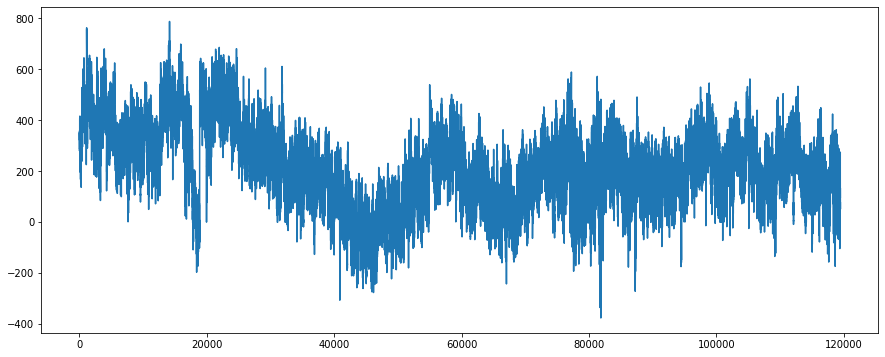

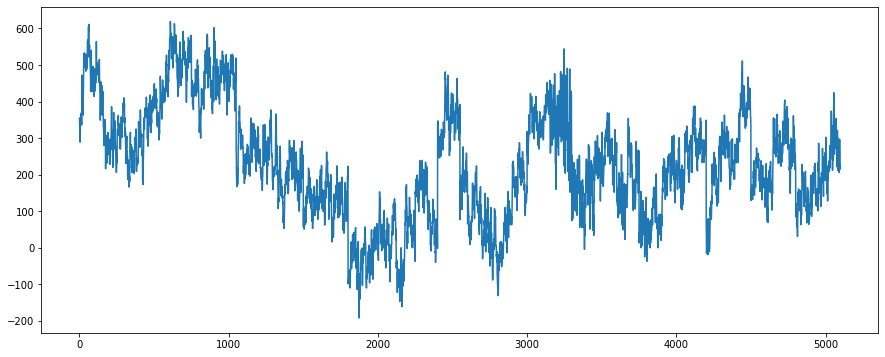

In [ ]:
P3_br = []
for i in range(119495):
  if BR[i] == 1:
    P3_br.append(P3[i])
 
print(P3_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3_br)

<Figure size 1440x432 with 0 Axes>

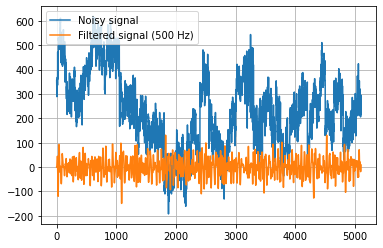

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_br, label='Noisy signal')

y4 = butter_bandpass_filter(P3_br, lowcut, highcut, fs, order=6)

plt.plot( y4, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y4))

5100


In [ ]:
y4 = np.array(y4)
import statistics

median = np.median(y4)
mean = y4.mean()
var = statistics.variance(y4)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y4)
peak2peak = max(y4)-min(y4)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1481.7619185178482
median =  0.8750583086580153
mean =  0.02506181242189996
Standard Deviation =  38.49366075755654
kurtosis =  4.8269147366639205
skewness =  -0.050397039568837336
Peak to peak =  279.9821882042643


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y4)

0.02506181242189996

In [ ]:
#2.median
median = np.median(y4)
median

0.8750583086580153

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y4)

1481.7619185178485

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y4)

38.49366075755654

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y4)

3.016322426145396

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y4)

-0.050397039568837336

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y4)

279.9821882042643

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y4)

38.48989484344741

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y4)

(array([5.62147663e-01, 3.62103648e-01, 7.80338491e-01, 2.60112817e+01,
        1.47926883e+02, 1.26982114e+02, 8.82958353e+01, 6.21568520e+01,
        6.78059464e+01, 5.61030468e+01, 3.55491891e+01, 3.68958464e+01,
        3.56632322e+01, 2.46838360e+01, 1.81413010e+01, 1.45507733e+01,
        8.51300676e+00, 2.79204473e+00, 6.06254688e-01, 3.19105206e-01,
        1.46067468e-01, 6.63982927e-02, 2.89494694e-02, 1.61548853e-02,
        1.04061751e-02, 6.52708819e-03, 4.07832562e-03, 2.37763656e-03,
        3.27037788e-03, 2.31321452e-03, 1.84212703e-03, 1.78166475e-03,
        1.70305014e-03, 1.50592782e-03, 1.44680579e-03, 1.37389226e-03,
        1.23357954e-03, 1.19732123e-03, 1.12890047e-03, 1.05083323e-03,
        1.04362409e-03, 9.52825920e-04, 9.18454903e-04, 8.77409689e-04,
        8.46593772e-04, 8.06683961e-04, 7.71859618e-04, 7.44565688e-04,
        7.12476160e-04, 6.88028022e-04, 6.61507263e-04, 6.38359306e-04,
        6.16067933e-04, 5.95146775e-04, 5.76358022e-04, 5.578409

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y4, sf=500, method='welch', normalize=True))

0.5006717477308196


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y4))

0.6179562476607692


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y4))

zs = numpy.where(numpy.diff(numpy.sign(y4)))[0]
zs

306


array([  17,   31,   50,   60,   64,   86,  111,  114,  121,  139,  165,
        180,  188,  195,  205,  216,  228,  238,  247,  260,  271,  285,
        308,  321,  334,  344,  349,  368,  389,  401,  410,  430,  449,
        469,  484,  495,  502,  522,  553,  569,  596,  607,  617,  633,
        651,  669,  683,  698,  711,  719,  740,  765,  783,  815,  832,
        863,  888,  900,  903,  928,  957,  983,  999, 1002, 1012, 1024,
       1027, 1041, 1061, 1069, 1081, 1097, 1127, 1152, 1165, 1171, 1184,
       1192, 1206, 1223, 1247, 1263, 1282, 1306, 1322, 1343, 1357, 1370,
       1392, 1408, 1426, 1435, 1444, 1459, 1467, 1479, 1497, 1515, 1531,
       1557, 1584, 1612, 1628, 1640, 1664, 1681, 1700, 1707, 1717, 1745,
       1765, 1783, 1793, 1805, 1811, 1817, 1832, 1856, 1884, 1913, 1949,
       1979, 1994, 1998, 2010, 2016, 2024, 2038, 2053, 2063, 2075, 2090,
       2107, 2130, 2152, 2178, 2201, 2212, 2225, 2246, 2253, 2262, 2271,
       2281, 2297, 2322, 2332, 2347, 2363, 2370, 23

## **P4 Channel**

[258, 282, 259, 266, 309, 276, 260, 294, 297, 313, 283, 270, 311, 316, 269, 255, 302, 355, 354, 326, 328, 346, 353, 289, 286, 311, 359, 370, 359, 395, 409, 426, 412, 395, 405, 412, 421, 400, 417, 427, 407, 420, 391, 417, 443, 426, 426, 422, 422, 406, 402, 411, 477, 487, 456, 448, 480, 477, 452, 515, 511, 471, 478, 502, 492, 464, 442, 443, 431, 411, 404, 360, 390, 399, 410, 372, 381, 442, 470, 464, 445, 441, 405, 402, 444, 418, 425, 460, 413, 405, 384, 396, 447, 397, 359, 376, 390, 339, 325, 366, 352, 352, 398, 393, 389, 413, 451, 457, 436, 420, 429, 450, 409, 434, 411, 409, 437, 416, 425, 429, 412, 410, 393, 399, 420, 438, 439, 390, 378, 392, 382, 399, 399, 429, 405, 411, 388, 366, 321, 272, 280, 279, 294, 307, 299, 303, 319, 291, 300, 315, 352, 334, 318, 356, 396, 400, 405, 416, 380, 361, 317, 294, 251, 259, 223, 206, 241, 262, 301, 215, 247, 270, 294, 318, 253, 226, 238, 290, 264, 209, 219, 216, 245, 249, 216, 209, 217, 215, 198, 245, 243, 204, 200, 232, 232, 206, 237, 252, 221, 205,

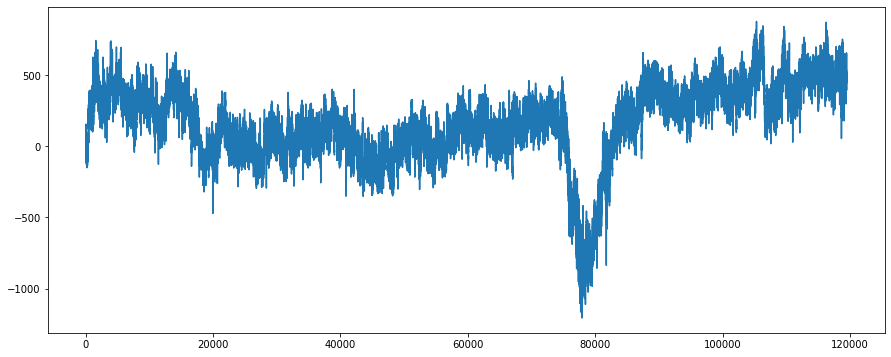

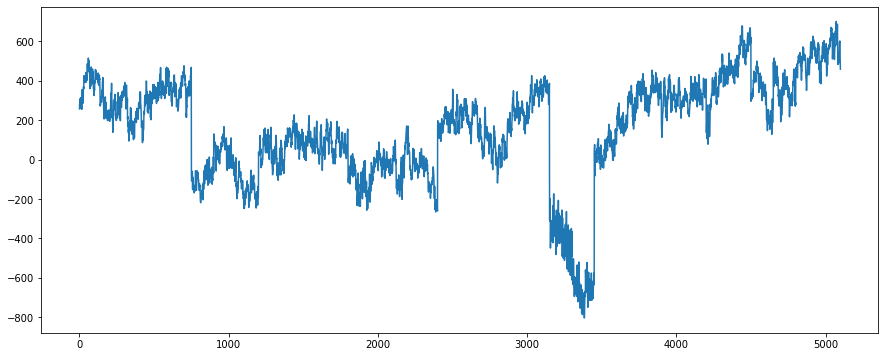

In [ ]:
P4_br = []
for i in range(119495):
  if BR[i] == 1:
    P4_br.append(P4[i])
 
print(P4_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4_br)

<Figure size 1440x432 with 0 Axes>

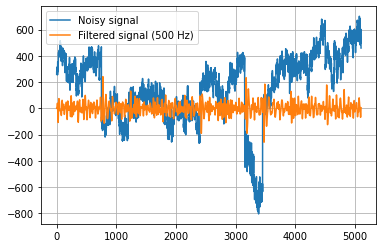

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_br, label='Noisy signal')

y5 = butter_bandpass_filter(P4_br, lowcut, highcut, fs, order=6)

plt.plot( y5, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y5))

5100


In [ ]:
y5 = np.array(y5)
import statistics

median = np.median(y5)
mean = y5.mean()
var = statistics.variance(y5)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y5)
peak2peak = max(y5)-min(y5)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  2293.7183727251922
median =  -0.7466813379270798
mean =  -0.04875130146096389
Standard Deviation =  47.892779964470556
kurtosis =  4.8269147366639205
skewness =  0.10472072901947829
Peak to peak =  499.0376058570664


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y5)

-0.04875130146096389

In [ ]:
#2.median
median = np.median(y5)
median

-0.7466813379270798

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y5)

2293.7183727251922

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y5)

47.892779964470556

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y5)

5.131492258424233

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y5)

0.10472072901947829

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y5)

499.0376058570664

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y5)

47.888109178730915

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y5)

(array([9.82043311e-01, 7.01741414e-01, 2.18364082e+00, 5.02146501e+01,
        2.38075727e+02, 2.14649415e+02, 2.07549024e+02, 1.42932391e+02,
        1.62731458e+02, 1.18220742e+02, 5.62224820e+01, 5.19187086e+01,
        4.79416237e+01, 4.30095642e+01, 3.92041231e+01, 1.92121253e+01,
        8.30866949e+00, 3.74156969e+00, 1.07317216e+00, 4.68324485e-01,
        2.64638882e-01, 9.23258889e-02, 3.66483718e-02, 2.31212100e-02,
        1.31396517e-02, 9.34183628e-03, 4.07930889e-03, 3.41489952e-03,
        3.13845926e-03, 2.32834672e-03, 2.23259398e-03, 2.00822656e-03,
        1.72226609e-03, 1.84213083e-03, 1.39375730e-03, 1.57989320e-03,
        1.31437140e-03, 1.28508699e-03, 1.24253188e-03, 1.14783221e-03,
        1.09087804e-03, 1.04747246e-03, 1.00138319e-03, 9.43155357e-04,
        9.13734224e-04, 8.73536309e-04, 8.29759443e-04, 8.03150900e-04,
        7.71465532e-04, 7.40321351e-04, 7.12348901e-04, 6.90020085e-04,
        6.64233756e-04, 6.40775927e-04, 6.21961299e-04, 6.004129

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y5, sf=500, method='welch', normalize=True))

0.49699280164256593


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y5))

0.5883751900170915


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y5))

zs = numpy.where(numpy.diff(numpy.sign(y5)))[0]
zs

300


array([  17,   30,   52,   84,   99,  107,  121,  137,  148,  151,  167,
        180,  192,  198,  208,  217,  224,  236,  249,  260,  271,  285,
        298,  310,  316,  324,  334,  340,  353,  369,  392,  405,  412,
        431,  447,  468,  487,  493,  499,  521,  551,  566,  576,  584,
        594,  608,  609,  616,  642,  659,  683,  707,  717,  722,  740,
        767,  782,  809,  837,  865,  898,  928,  957,  985, 1012, 1038,
       1062, 1071, 1080, 1096, 1127, 1148, 1164, 1173, 1180, 1190, 1204,
       1230, 1250, 1285, 1295, 1304, 1319, 1341, 1356, 1377, 1392, 1408,
       1444, 1460, 1472, 1479, 1498, 1513, 1534, 1561, 1583, 1613, 1630,
       1643, 1653, 1662, 1669, 1681, 1695, 1708, 1719, 1748, 1773, 1790,
       1792, 1802, 1811, 1818, 1831, 1858, 1883, 1895, 1900, 1912, 1949,
       1978, 2007, 2036, 2051, 2062, 2073, 2084, 2096, 2110, 2117, 2136,
       2152, 2179, 2203, 2213, 2238, 2263, 2292, 2319, 2339, 2350, 2364,
       2393, 2415, 2431, 2457, 2481, 2504, 2524, 25

### **Pz Channel**

[300, 306, 300, 304, 336, 338, 348, 363, 366, 384, 359, 360, 399, 383, 362, 361, 407, 458, 426, 423, 410, 408, 401, 372, 388, 411, 438, 454, 449, 481, 473, 491, 491, 504, 511, 479, 498, 474, 484, 485, 490, 481, 476, 498, 521, 511, 518, 524, 508, 480, 475, 465, 492, 522, 511, 517, 522, 530, 528, 554, 568, 573, 554, 554, 532, 515, 503, 514, 495, 485, 471, 438, 428, 428, 428, 399, 412, 452, 470, 435, 438, 416, 400, 406, 424, 428, 426, 428, 415, 402, 409, 417, 422, 382, 393, 395, 381, 372, 382, 390, 389, 404, 416, 449, 455, 441, 482, 495, 455, 450, 445, 454, 459, 493, 457, 456, 487, 483, 502, 471, 467, 455, 414, 442, 437, 438, 447, 415, 405, 402, 401, 408, 420, 439, 403, 407, 394, 367, 364, 310, 316, 320, 334, 365, 349, 353, 363, 368, 384, 372, 305, 309, 287, 293, 336, 351, 344, 337, 326, 302, 265, 262, 231, 206, 216, 211, 216, 241, 278, 240, 262, 289, 300, 305, 249, 225, 254, 266, 265, 227, 224, 210, 229, 239, 237, 239, 233, 250, 271, 260, 263, 266, 248, 242, 250, 225, 232, 267, 243, 218,

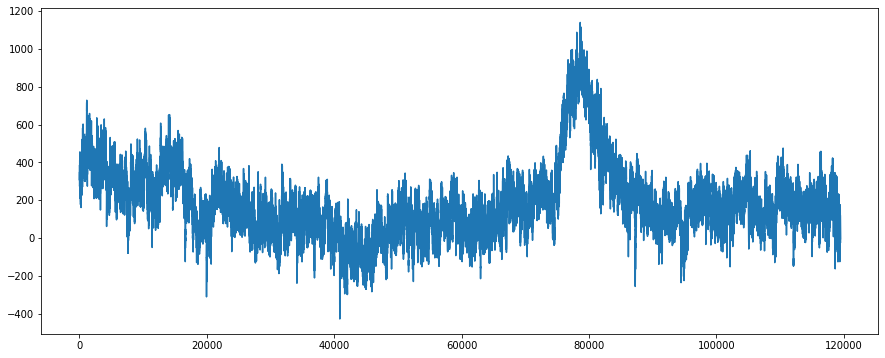

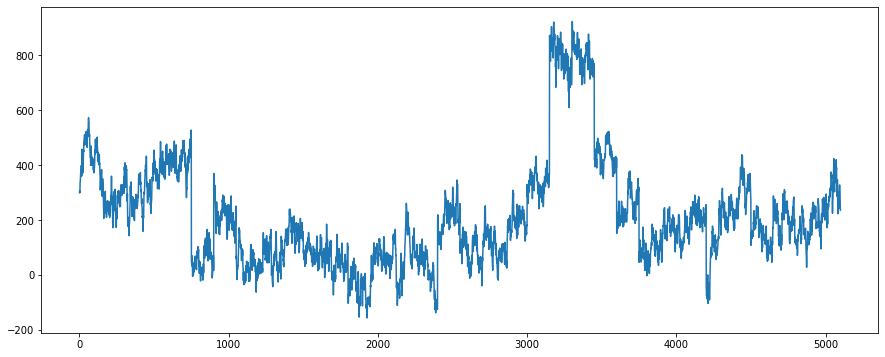

In [ ]:
Pz_br = []
for i in range(119495):
  if BR[i] == 1:
    Pz_br.append(Pz[i])
 
print(Pz_br)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz_br)

<Figure size 1440x432 with 0 Axes>

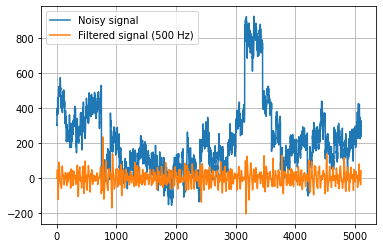

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_br, label='Noisy signal')

y6 = butter_bandpass_filter(Pz_br, lowcut, highcut, fs, order=6)

plt.plot( y6, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y6))

5100


In [ ]:
y6 = np.array(y6)
import statistics

median = np.median(y6)
mean = y6.mean()
var = statistics.variance(y6)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y6)
peak2peak = max(y6)-min(y6)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1706.6654058144234
median =  0.7602612448756223
mean =  0.0007571383202450784
Standard Deviation =  41.31180709935627
kurtosis =  4.8269147366639205
skewness =  0.03660641276231159
Peak to peak =  440.1018465312047


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y6)

0.0007571383202450784

In [ ]:
#2.median
median = np.median(y6)
median

0.7602612448756223

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y6)

1706.6654058144231

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y6)

41.31180709935627

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y6)

4.67832735956057

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y6)

0.03660641276231159

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y6)

440.1018465312047

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y6)

41.30775673057098

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y6)

(array([7.67821316e-01, 5.73204824e-01, 1.11082843e+00, 2.46572689e+01,
        1.65696299e+02, 1.84618149e+02, 1.51880665e+02, 8.44580381e+01,
        7.73353218e+01, 5.24290194e+01, 4.87957036e+01, 4.54453244e+01,
        3.42990177e+01, 1.70209318e+01, 1.65370319e+01, 1.71342218e+01,
        8.30089978e+00, 3.15706723e+00, 9.87944765e-01, 3.45000831e-01,
        1.67967515e-01, 6.39839714e-02, 3.66654898e-02, 1.28200994e-02,
        8.85514661e-03, 6.28927561e-03, 3.40670649e-03, 2.65009452e-03,
        2.87896024e-03, 2.25272928e-03, 1.85179937e-03, 1.65542540e-03,
        1.55163284e-03, 1.55861094e-03, 1.25352106e-03, 1.35040834e-03,
        1.15865289e-03, 1.13538989e-03, 1.07202310e-03, 9.96236868e-04,
        9.69947813e-04, 9.08756539e-04, 8.75486967e-04, 8.31442531e-04,
        8.01610994e-04, 7.64185749e-04, 7.32107347e-04, 7.03130393e-04,
        6.79170410e-04, 6.48209283e-04, 6.28104552e-04, 6.04555816e-04,
        5.83684727e-04, 5.64386685e-04, 5.45941959e-04, 5.279771

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y6, sf=500, method='welch', normalize=True))

0.480204396985054


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y6))

0.5893809903046345


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y6))

zs = numpy.where(numpy.diff(numpy.sign(y6)))[0]
zs

288


array([  17,   31,   53,   86,  118,  137,  162,  179,  188,  197,  208,
        213,  226,  238,  249,  260,  271,  284,  299,  305,  315,  334,
        352,  370,  394,  404,  407,  427,  449,  468,  485,  494,  500,
        521,  550,  568,  595,  609,  623,  634,  647,  659,  682,  700,
        705,  713,  740,  766,  782,  808,  836,  866,  900,  905,  914,
        929,  956,  984, 1012, 1038, 1061, 1070, 1081, 1097, 1126, 1149,
       1165, 1171, 1182, 1194, 1207, 1226, 1248, 1260, 1270, 1278, 1286,
       1304, 1319, 1340, 1356, 1380, 1394, 1405, 1421, 1434, 1447, 1459,
       1469, 1483, 1500, 1512, 1530, 1555, 1582, 1613, 1629, 1642, 1653,
       1660, 1667, 1681, 1696, 1706, 1719, 1748, 1772, 1786, 1793, 1805,
       1810, 1817, 1831, 1861, 1884, 1894, 1898, 1912, 1948, 1978, 2007,
       2017, 2020, 2037, 2053, 2063, 2075, 2099, 2106, 2131, 2153, 2178,
       2202, 2214, 2226, 2231, 2240, 2264, 2294, 2320, 2338, 2349, 2362,
       2372, 2375, 2394, 2415, 2430, 2454, 2477, 25